In [1]:
import pyscf
import pyscf.tools
import pyscf.cc
import pyscf.qmmm
from pyscf import lib
from pyscf import gto
from pyscf import df
from pyscf import scf
from pyscf import mcscf
from pyscf import grad
from pyscf.lib import logger
from pyscf.gto import M
from pyscf.scf import RHF
import pyscf.lib
import numpy as np
import numpy
import matplotlib.pyplot as plt
angstrom=1.889725989
from numpy.linalg import inv,norm

In [2]:
def qmmmcalc(mol,dh):
    deltaZ = np.array((dh,-dh))
    mf = pyscf.qmmm.mm_charge(pyscf.scf.RHF(mol), mol.atom_coords(), deltaZ,unit='bohr')
    class NoSelfQMMM(mf.__class__):
        def energy_nuc(self):
            e_nuc=(mol.atom_charge(0)+dh)*(mol.atom_charge(1)-dh)/np.linalg.norm(self.mol.atom_coords()[0]-self.mol.atom_coords()[1])
            return e_nuc
    mf = NoSelfQMMM()
    return mf

In [3]:
CO=M(atom='C 0 0 0;O 0 0 2.',basis= 'def2-TZVP',unit='bohr')
NN=M(atom='N 0 0 0;N 0 0 2.',basis= 'def2-TZVP',unit='bohr')
nnhf=RHF(NN)
nn_co=qmmmcalc(CO,1)

In [4]:
print(nn_co.energy_nuc())
CO.energy_nuc()

24.5


24.0

In [5]:
nn_co.kernel()
nnhf.kernel()

converged SCF energy = -108.898047903918
converged SCF energy = -108.991204984885


-108.99120498488548

In [6]:
#single atom qmmmm
def saqmmm(mol,dh):
    mf = pyscf.qmmm.mm_charge(pyscf.scf.RHF(mol), mol.atom_coords(), np.asarray([dh]),unit='bohr')
    class NoSelfQMMM(mf.__class__):
        def energy_nuc(self):
            e_nuc=0
            return e_nuc
    mf = NoSelfQMMM()
    return mf

In [7]:
C=M(atom='C 0 0 0',basis='def2-TZVP',charge=-1,spin=1)
O=M(atom='O 0 0 0',basis='def2-TZVP',charge=1,spin=1)
N=M(atom='N 0 0 0',basis='def2-TZVP',spin=1)
nhf=pyscf.scf.UHF(N)
nchf=saqmmm(C,1)
nohf=saqmmm(O,-1)

In [8]:
nhf.kernel()
nchf.kernel()
nohf.kernel()

converged SCF energy = -54.266103072602  <S^2> = 0.7556305  2S+1 = 2.0056226
converged SCF energy = -54.2024596995637
converged SCF energy = -54.2168031515304


-54.216803151530435

In [9]:
print('molecolar error due to basis set', nn_co.kernel()-nnhf.kernel())
print('atomic error due to basis set',nchf.kernel()+nohf.kernel()-2*nhf.kernel())

converged SCF energy = -108.898047903918
converged SCF energy = -108.991204984885
molecolar error due to basis set 0.0931570809671598
converged SCF energy = -54.2024596995637
converged SCF energy = -54.2168031515304
converged SCF energy = -54.2661030726042  <S^2> = 0.75563049  2S+1 = 2.0056226
atomic error due to basis set 0.11294329411416015


In [10]:
CO=M(atom='C 0 0 0;O 0 0 2.',basis= 'sto-3G',unit='bohr')
NN=M(atom='N 0 0 0;N 0 0 2.',basis= 'sto-3G',unit='bohr')
nnhf=RHF(NN)
nn_co=qmmmcalc(CO,1)
nn_co.kernel()
nnhf.kernel()

converged SCF energy = -105.426870589041
converged SCF energy = -107.478024957254


-107.47802495725438

In [11]:
C=M(atom='C 0 0 0',basis='sto-3G',charge=-1,spin=1)
O=M(atom='O 0 0 0',basis='sto-3G',charge=1,spin=1)
N=M(atom='N 0 0 0',basis='sto-3G',spin=1)
nhf=pyscf.scf.UHF(N)
nchf=saqmmm(C,1)
nohf=saqmmm(O,-1)
nhf.kernel()
nchf.kernel()
nohf.kernel()

converged SCF energy = -53.5545360887047  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -52.4503266150752
converged SCF energy = -52.3356987471301


-52.335698747130074

In [12]:
print('molecolar error due to basis set', nn_co.kernel()-nnhf.kernel())
print('atomic error due to basis set',nchf.kernel()+nohf.kernel()-2*nhf.kernel())

converged SCF energy = -105.426870589041
converged SCF energy = -107.478024957254
molecolar error due to basis set 2.0511543682132185
converged SCF energy = -52.4503266150752
converged SCF energy = -52.3356987471301
converged SCF energy = -53.5545360887047  <S^2> = 0.75  2S+1 = 2
atomic error due to basis set 2.3230468152041226


In [13]:
basis=['sto-3G','sto-6G','3-21G','6-31G*','cc-pVTZ','aug-ccpvqz','def2-TZVP','def2-QZVPP']
atoms_error={}
molecule_error={}
for base in basis:
    CO=M(atom='C 0 0 0;O 0 0 2.',basis=base ,unit='bohr')
    NN=M(atom='N 0 0 0;N 0 0 2.',basis=base,unit='bohr')
    nnhf=RHF(NN)
    nn_co=qmmmcalc(CO,1)
    C=M(atom='C 0 0 0',basis=base,charge=-1,spin=1)
    O=M(atom='O 0 0 0',basis=base,charge=1,spin=1)
    N=M(atom='N 0 0 0',basis=base,spin=1)
    nhf=pyscf.scf.RHF(N)
    nchf=saqmmm(C,1)
    nohf=saqmmm(O,-1)
    me=nn_co.kernel()-nnhf.kernel()
    ae=nchf.kernel()+nohf.kernel()-2*nhf.kernel()
    print('molecolar error due to basis set', me)
    print('atomic error due to basis set',ae)
    atoms_error.update({base:ae})
    molecule_error.update({base:me})

converged SCF energy = -105.426870589041
converged SCF energy = -107.478024957254
converged SCF energy = -52.4503266150752
converged SCF energy = -52.3356987471301
converged SCF energy = -53.5545360887047
molecolar error due to basis set 2.051154368213247
atomic error due to basis set 2.323046815204094
converged SCF energy = -106.460477445989
converged SCF energy = -108.523478472693
converged SCF energy = -53.0294531802803
converged SCF energy = -52.7760259243052
converged SCF energy = -54.0845800998906
molecolar error due to basis set 2.0630010267038585
atomic error due to basis set 2.3636810951958296
converged SCF energy = -106.480338237707
converged SCF energy = -108.29889701394
converged SCF energy = -52.9123697614082
converged SCF energy = -53.1309572497241
converged SCF energy = -53.9598946415259
molecolar error due to basis set 1.8185587762333455
atomic error due to basis set 1.87646227191955
converged SCF energy = -107.094345834234
converged SCF energy = -108.94172152653
conver

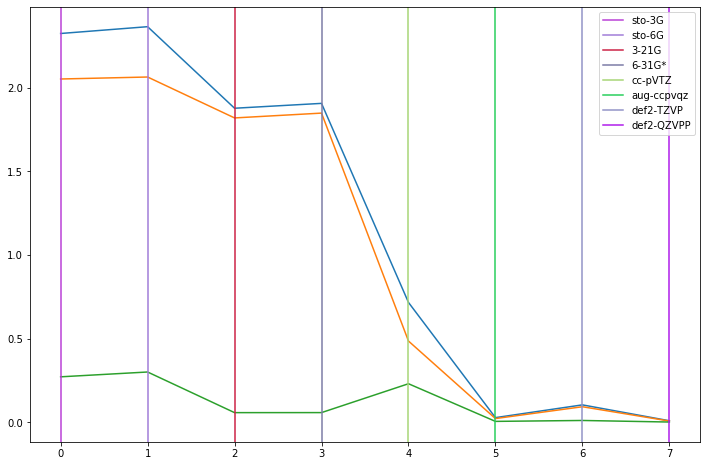

In [94]:
fig=plt.figure(figsize=(12,8))
plt.plot([atoms_error[x]for x in atoms_error.keys()])
plt.plot([molecule_error[x]for x in molecule_error.keys()])
plt.plot([atoms_error[x]-molecule_error[x] for x in molecule_error.keys()])
for i in range(8):
    plt.axvline(i,color=np.random.rand(3,) ,label=basis[i])
plt.legend()

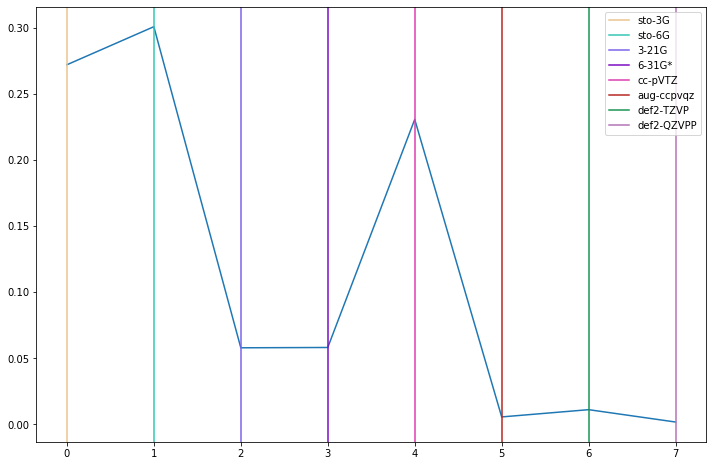

In [30]:
fig=plt.figure(figsize=(12,8))
plt.plot([atoms_error[x]-molecule_error[x] for x in molecule_error.keys()])
for i in range(8):
    plt.axvline(i,color=np.random.rand(3,) ,label=basis[i])
plt.legend()

In [31]:
import pandas as pd

In [98]:
co_to_nn=pd.DataFrame({'basis':basis,'atom_err':list(atoms_error.values()),'mol_err':list(molecule_error.values())\
                      ,'correction':[atoms_error[x]-molecule_error[x] for x in basis]})

In [99]:
co_to_nn

,basis,atom_err,mol_err,correction
0,sto-3G,2.323047,2.051154,0.271892
1,sto-6G,2.363681,2.063001,0.300680
2,3-21G,1.876462,1.818559,0.057903
3,6-31G*,1.905519,1.847376,0.058143
4,cc-pVTZ,0.716186,0.485608,0.230578
5,aug-ccpvqz,0.028101,0.022463,0.005638
6,def2-TZVP,0.104278,0.093157,0.011121
7,def2-QZVPP,0.009444,0.007670,0.001775


In [101]:
# co to bf
atoms_error={}
molecule_error={}
for base in basis:
    CO=M(atom='C 0 0 0;O 0 0 2.',basis=base,unit='bohr')
    BF=M(atom='B 0 0 0;F 0 0 2.',basis=base,unit='bohr')
    bfhf=RHF(BF)
    bf_co=qmmmcalc(CO,-1)
    C=M(atom='C 0 0 0',basis=base,charge=1,spin=1)
    O=M(atom='O 0 0 0',basis=base,charge=-1,spin=1)
    B=M(atom='B 0 0 0',basis=base,spin=1)
    F=M(atom='F 0 0 0',basis=base,spin=1)
    bhf=pyscf.scf.RHF(B)
    fhf=pyscf.scf.RHF(F)
    bchf=saqmmm(C,-1)
    fohf=saqmmm(O,1)
    me=bf_co.kernel()-bfhf.kernel()
    ae=bchf.kernel()+fohf.kernel()-bhf.kernel()-fhf.kernel()
    print('molecolar error due to basis set', me)
    print('atomic error due to basis set',ae)
    atoms_error.update({base:ae})
    molecule_error.update({base:me})

converged SCF energy = -119.859874016411
converged SCF energy = -122.290018654184
converged SCF energy = -22.9534307219899
converged SCF energy = -96.5898618625372
converged SCF energy = -24.1489885988536
converged SCF energy = -97.9865049587358
molecolar error due to basis set 2.4301446377726847
atomic error due to basis set 2.592200973062319
converged SCF energy = -121.067585885474
converged SCF energy = -123.462818070545
converged SCF energy = -23.1257648297767
converged SCF energy = -97.5794683813268
converged SCF energy = -24.3942945593718
converged SCF energy = -98.913253015237
molecolar error due to basis set 2.3952321850708245
atomic error due to basis set 2.6023143635053145
converged SCF energy = -121.515338528952
converged SCF energy = -123.328617658845
converged SCF energy = -23.5566360959325
converged SCF energy = -97.8066576468171
converged SCF energy = -24.3896343503324
converged SCF energy = -98.8446451100664
molecolar error due to basis set 1.8132791298923507
atomic err

In [102]:
co_to_bf=pd.DataFrame({'basis':basis,'atom_err':list(atoms_error.values()),'mol_err':list(molecule_error.values())\
                      ,'correction':[atoms_error[x]-molecule_error[x] for x in basis]})

In [103]:
co_to_bf

,basis,atom_err,mol_err,correction
0,sto-3G,2.592201,2.430145,0.162056
1,sto-6G,2.602314,2.395232,0.207082
2,3-21G,1.870986,1.813279,0.057707
3,6-31G*,1.904033,1.841194,0.062838
4,cc-pVTZ,0.658558,0.457869,0.200689
5,aug-ccpvqz,0.017868,0.014776,0.003092
6,def2-TZVP,0.104681,0.092202,0.012480
7,def2-QZVPP,0.014188,0.013548,0.000641


In [105]:
co_to_bf.to_pickle('CO_to_BF')

In [106]:
co_to_nn.to_pickle('CO_to_NN')

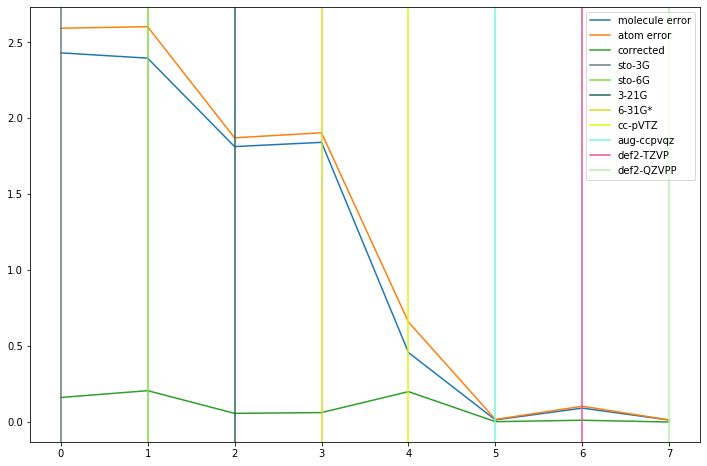

In [107]:
fig=plt.figure(figsize=(12,8))
plt.plot(co_to_bf.mol_err,label='molecule error')
plt.plot(co_to_bf.atom_err,label='atom error')
plt.plot(co_to_bf.correction,label='corrected')
for i in range(8):
    plt.axvline(i,color=np.random.rand(3,) ,label=basis[i])
plt.legend()

## Full CI implementation

In [47]:
from pyscf import gto, scf, ao2mo, fci
mol = N
mf = scf.RHF(mol).run()
h1 = mf.mo_coeff.T.dot(mf.get_hcore()).dot(mf.mo_coeff)
eri = ao2mo.kernel(mol, mf.mo_coeff)
cisolver = fci.direct_spin1.FCI(mol)
e, ci = cisolver.kernel(h1, eri, h1.shape[1], mol.nelec, ecore=mol.energy_nuc(),verbose=5)
print(e)

converged SCF energy = -53.5545360887047
-53.719010162593925


In [50]:
mol = C
mf = saqmmm(mol,1).run()
h1 = mf.mo_coeff.T.dot(mf.get_hcore()).dot(mf.mo_coeff)
eri = ao2mo.kernel(mol, mf.mo_coeff)
cisolver = fci.direct_spin1.FCI(mol)
e, ci = cisolver.kernel(h1, eri, h1.shape[1], mol.nelec, ecore=mol.energy_nuc(),verbose=5)
print(e)

converged SCF energy = -52.4503266150752
-52.59540118080676


In [51]:
mol = O
mf = saqmmm(mol,-1).run()
h1 = mf.mo_coeff.T.dot(mf.get_hcore()).dot(mf.mo_coeff)
eri = ao2mo.kernel(mol, mf.mo_coeff)
cisolver = fci.direct_spin1.FCI(mol)
e, ci = cisolver.kernel(h1, eri, h1.shape[1], mol.nelec, ecore=mol.energy_nuc(),verbose=5)
print(e)

converged SCF energy = -52.3356987471301
-52.52547652760362
